# Concrete strength Machine learning model

Importing the libraries

In [29]:
# pip install pycaret[full]

In [30]:
from pycaret.classification import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as  sns
sns.set_style('darkgrid')

In [31]:
# Reading the data

df_raw = pd.read_csv('data/concrete_data.csv')
df = df_raw.copy(deep = True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [32]:
df.columns.to_list()

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Strength']

In [33]:
print(df.info())
print('-'*40)
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
----------------------------------------
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004   

Checking duplicates

In [34]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


25


In [35]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Exploratory Data Analysis

### Feature Engineering

In [36]:
df['Cement_to_Water_Ratio'] = df['Cement'] / df['Water']
df['Cement_to_Aggregate_Ratio'] = df['Cement'] / (df['Coarse Aggregate'] + df['Fine Aggregate'])
df['Superplasticizer_to_Cement_Ratio'] = df['Superplasticizer'] / df['Cement']
df['Superplasticizer_to_Water_Ratio'] = df['Superplasticizer'] / df['Water']
df['Coarse_Aggregate_to_Fine_Aggregate_Ratio'] = df['Coarse Aggregate'] / df['Fine Aggregate']


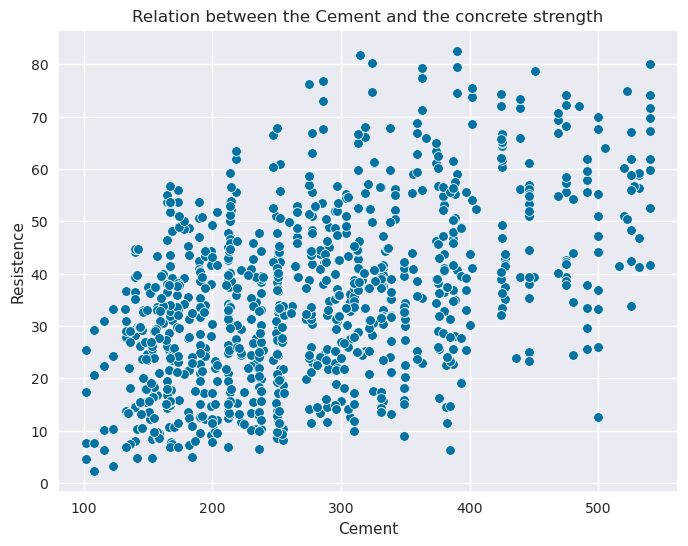

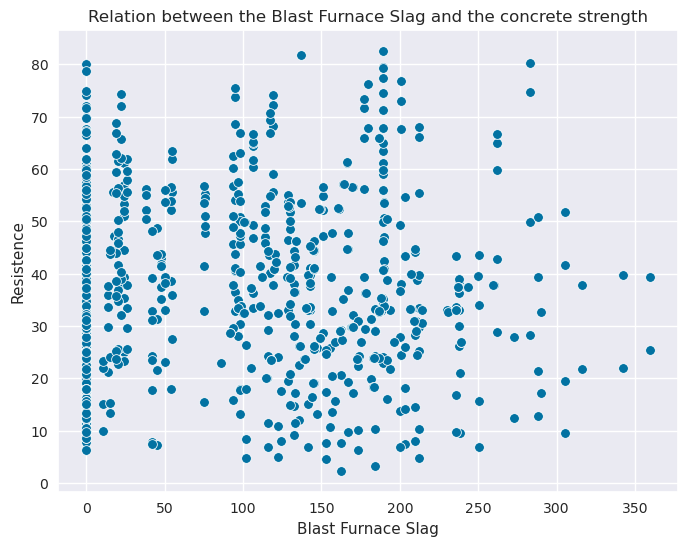

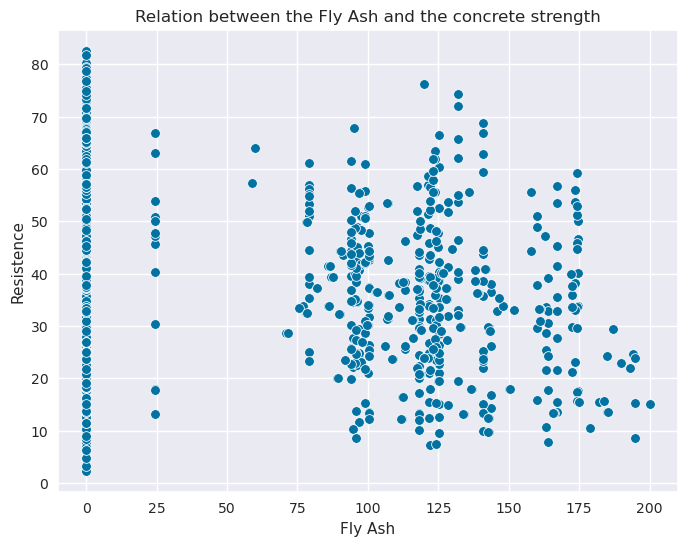

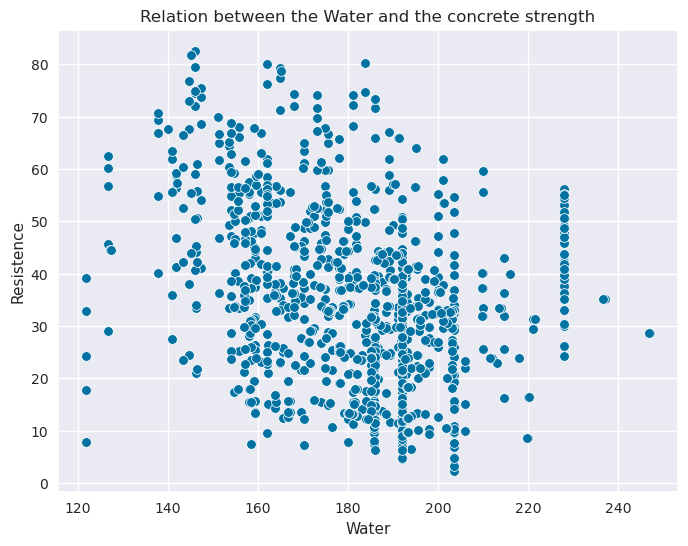

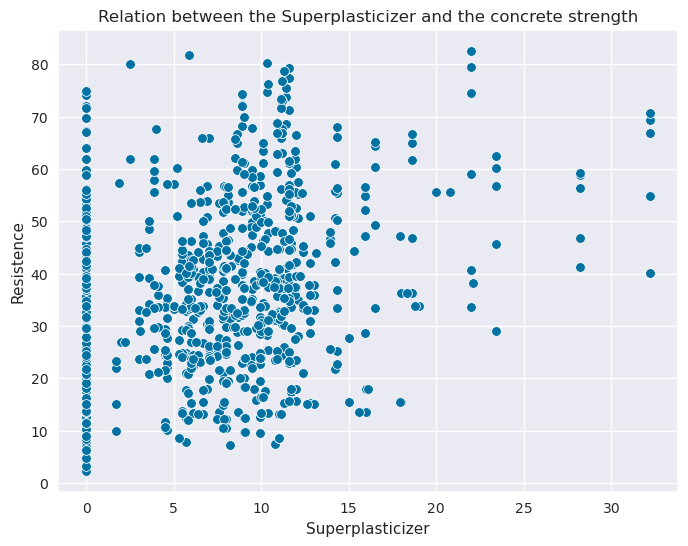

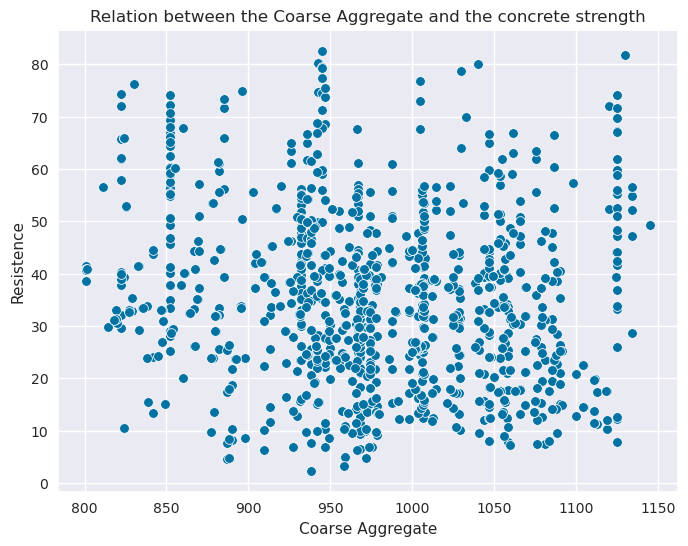

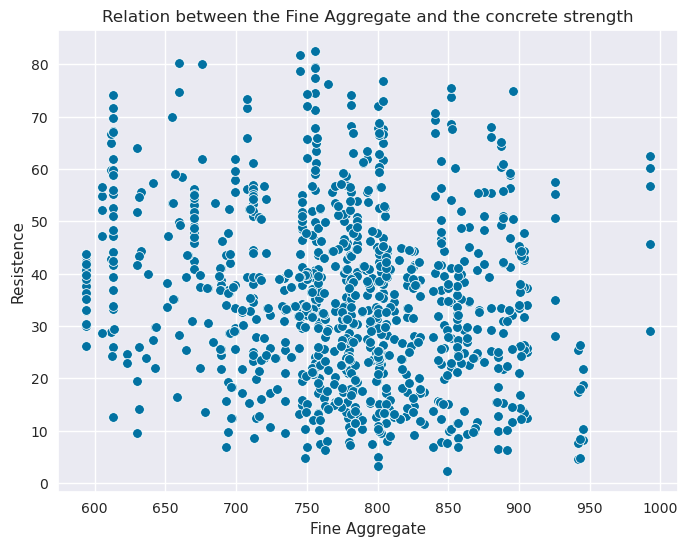

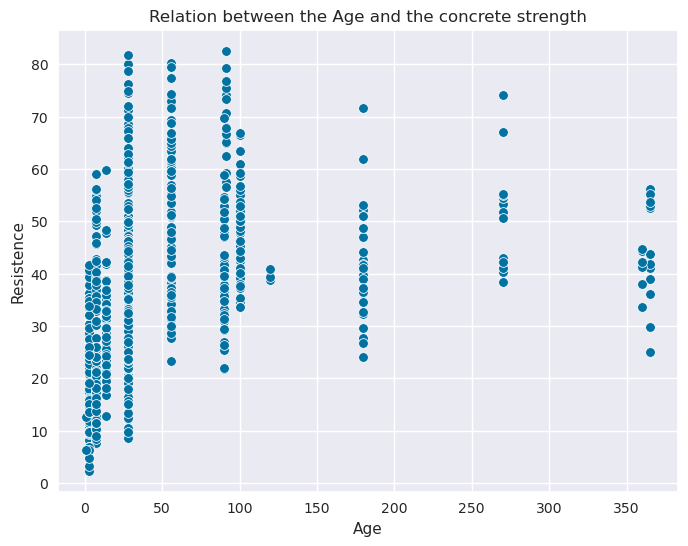

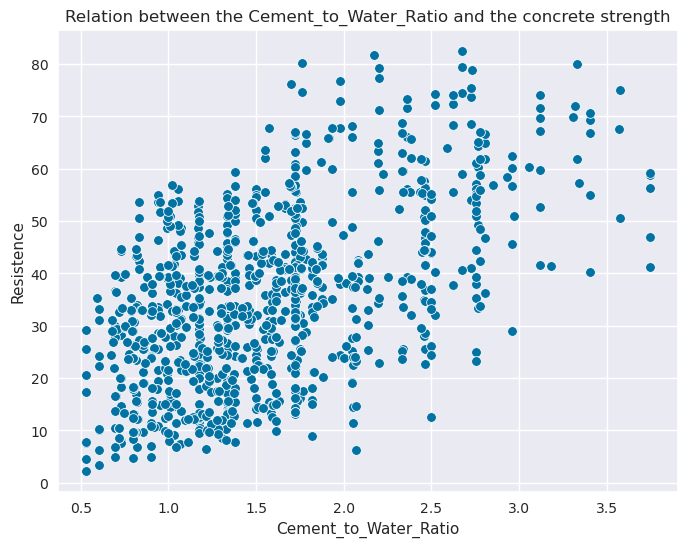

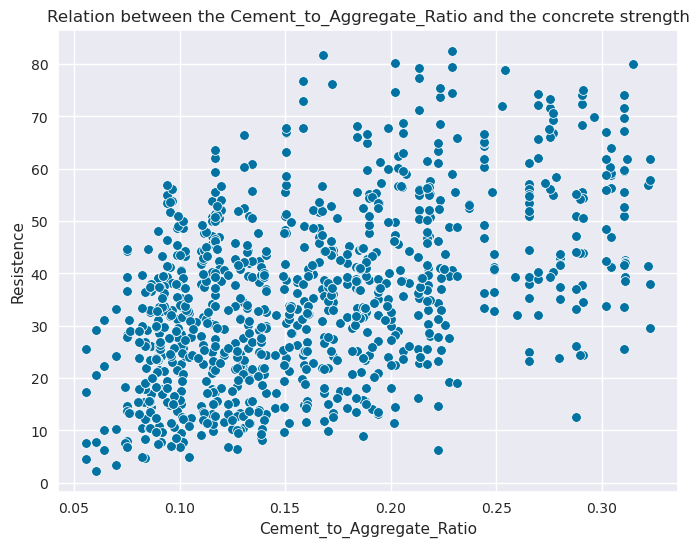

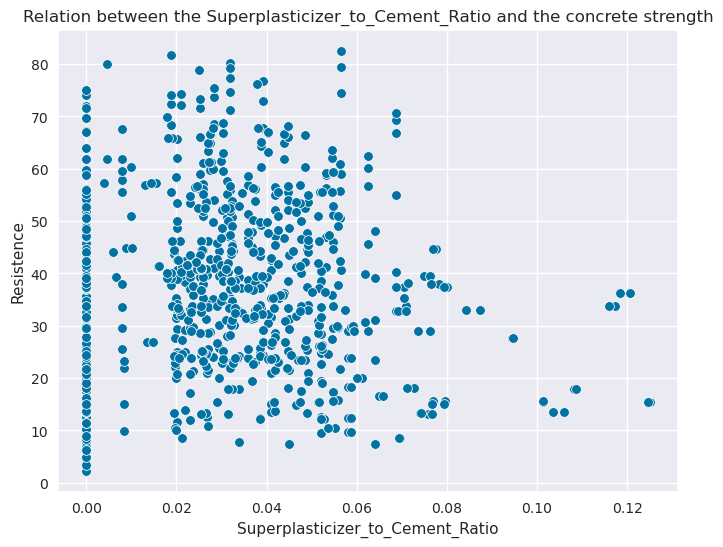

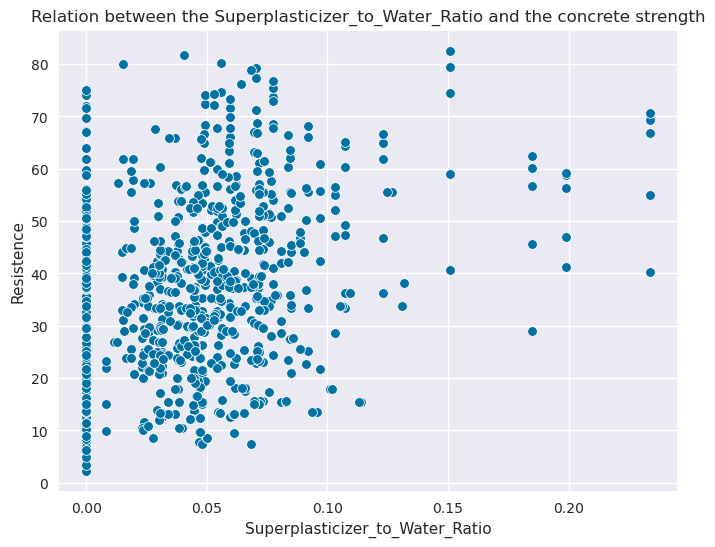

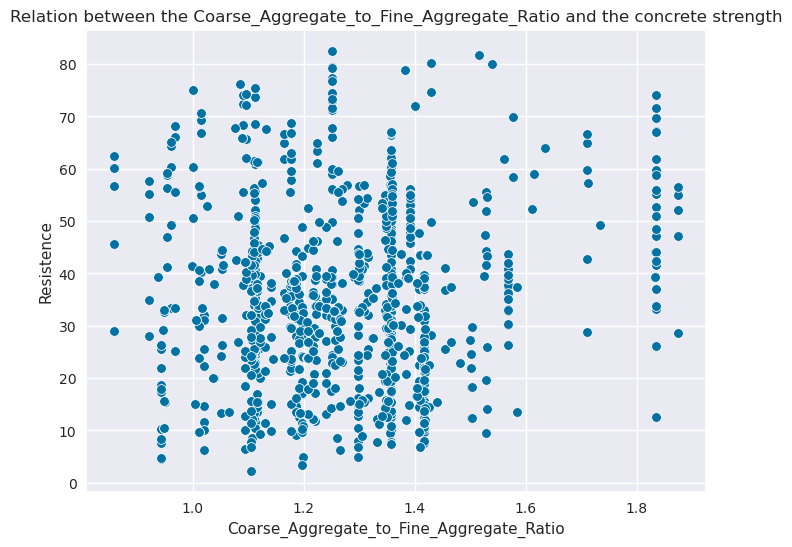

In [37]:
for column in df.columns:
    if column != 'Strength':  # Exclude the target column from plotting
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column, y='Strength')
        plt.title(f'Relation between the {column} and the concrete strength')
        plt.xlabel(column)
        plt.ylabel('Resistence')
        plt.show()


### Machine Learning

Calculation the correlation between the variables

In [38]:
corr_matrix = df.corr()

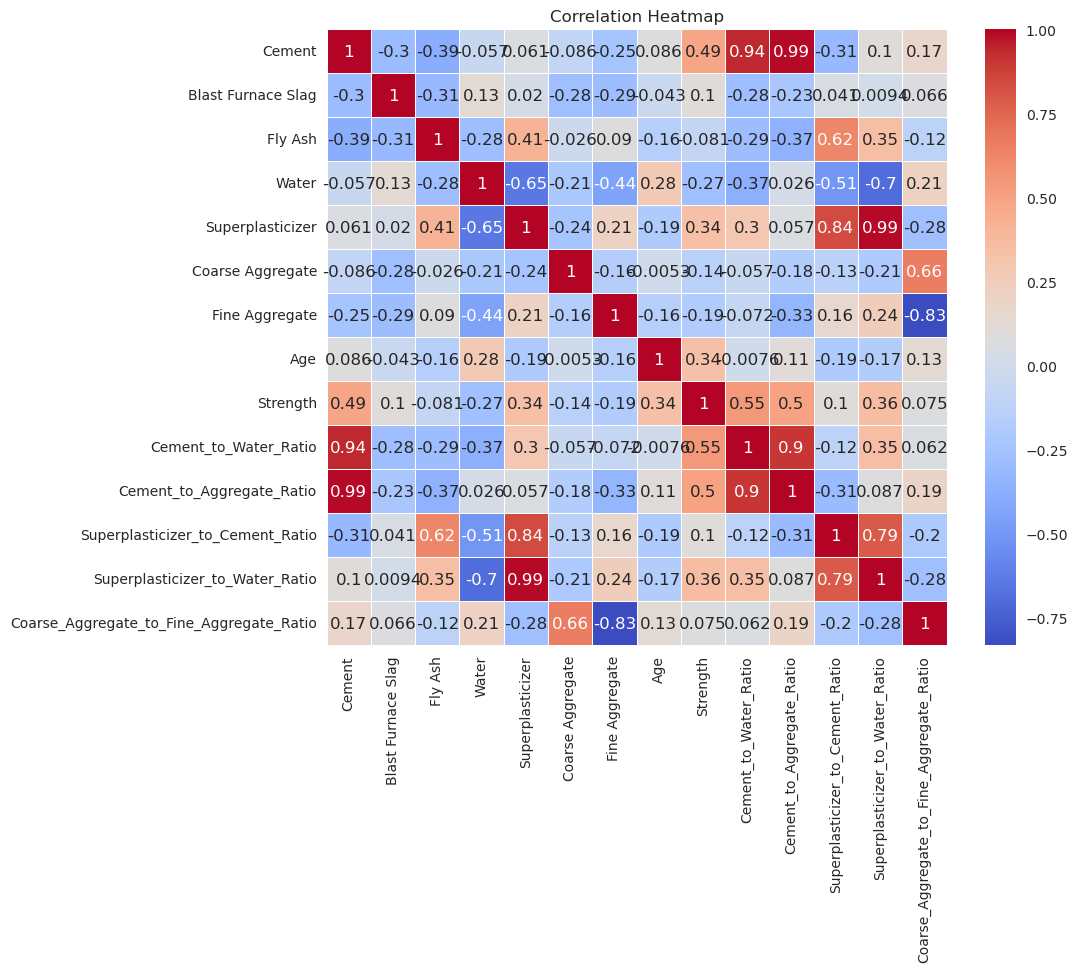

In [39]:
# Plotting the heat map

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Dropping columns that are used in ratios or are not useful for the model.

In [40]:
df.columns.to_list()

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Strength',
 'Cement_to_Water_Ratio',
 'Cement_to_Aggregate_Ratio',
 'Superplasticizer_to_Cement_Ratio',
 'Superplasticizer_to_Water_Ratio',
 'Coarse_Aggregate_to_Fine_Aggregate_Ratio']

In [41]:
drop_columns = ['Cement', 'Water', 'Superplasticizer_to_Water_Ratio', 'Superplasticizer_to_Cement_Ratio', 'Cement_to_Aggregate_Ratio','Coarse_Aggregate_to_Fine_Aggregate_Ratio']

df = df.drop(drop_columns, axis=1)

df.head()

,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Cement_to_Water_Ratio
0,0.0,0.0,2.5,1040.0,676.0,28,79.99,3.333333
1,0.0,0.0,2.5,1055.0,676.0,28,61.89,3.333333
2,142.5,0.0,0.0,932.0,594.0,270,40.27,1.458333
3,142.5,0.0,0.0,932.0,594.0,365,41.05,1.458333
4,132.4,0.0,0.0,978.4,825.5,360,44.30,1.034375


In [44]:
train, test = train_test_split(df, test_size=0.3, random_state=42)


In [47]:
df

,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Cement_to_Water_Ratio
0,0.0,0.0,2.5,1040.0,676.0,28,79.99,3.333333
1,0.0,0.0,2.5,1055.0,676.0,28,61.89,3.333333
2,142.5,0.0,0.0,932.0,594.0,270,40.27,1.458333
3,142.5,0.0,0.0,932.0,594.0,365,41.05,1.458333
4,132.4,0.0,0.0,978.4,825.5,360,44.30,1.034375
...,...,...,...,...,...,...,...,...
1025,116.0,90.3,8.9,870.1,768.3,28,44.28,1.538976
1026,0.0,115.6,10.4,817.9,813.4,28,31.18,1.643878
1027,139.4,108.6,6.1,892.4,780.0,28,23.70,0.770628
1028,186.7,0.0,11.3,989.6,788.9,28,32.77,0.906036


In [ ]:
clf = setup(data=train, target='Strength', session_id=123, use_gpu=True)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# Treinar e Comparar Modelos
PyCaret compara diferentes modelos automaticamente e mostra o melhor.

In [ ]:
# Comparar e obter o melhor modelo
best_model = compare_models(include = ['lr', 'rf', 'lightgbm', 'catboost'])
print("Melhor modelo:", best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8328,0.8571,0.7312,0.8152,0.7680,0.6383,0.6435,0.0740
catboost,CatBoost Classifier,0.8216,0.8569,0.6723,0.8311,0.7409,0.6076,0.6174,0.4870
rf,Random Forest Classifier,0.8006,0.8397,0.7062,0.7611,0.7299,0.5725,0.5761,0.3740
lr,Logistic Regression,0.7877,0.8511,0.6471,0.7666,0.6985,0.5370,0.5441,0.6300


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Melhor modelo: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# Treinar e Comparar Modelos
PyCaret compara diferentes modelos automaticamente e mostra o melhor.

In [ ]:
# Comparar e obter o melhor modelo
best_model = compare_models(include = ['lr', 'rf', 'lightgbm', 'catboost'])
print("Melhor modelo:", best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8328,0.8571,0.7312,0.8152,0.7680,0.6383,0.6435,0.0740
catboost,CatBoost Classifier,0.8216,0.8569,0.6723,0.8311,0.7409,0.6076,0.6174,0.4870
rf,Random Forest Classifier,0.8006,0.8397,0.7062,0.7611,0.7299,0.5725,0.5761,0.3740
lr,Logistic Regression,0.7877,0.8511,0.6471,0.7666,0.6985,0.5370,0.5441,0.6300


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Melhor modelo: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# Treinar e Comparar Modelos
PyCaret compara diferentes modelos automaticamente e mostra o melhor.

In [ ]:
# Comparar e obter o melhor modelo
best_model = compare_models(include = ['lr', 'rf', 'lightgbm', 'catboost'])
print("Melhor modelo:", best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8328,0.8571,0.7312,0.8152,0.7680,0.6383,0.6435,0.0740
catboost,CatBoost Classifier,0.8216,0.8569,0.6723,0.8311,0.7409,0.6076,0.6174,0.4870
rf,Random Forest Classifier,0.8006,0.8397,0.7062,0.7611,0.7299,0.5725,0.5761,0.3740
lr,Logistic Regression,0.7877,0.8511,0.6471,0.7666,0.6985,0.5370,0.5441,0.6300


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Melhor modelo: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
